<a href="https://colab.research.google.com/github/Mitajoshi/citibike/blob/main/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Embeddings

Embeddings are a way of converting categorical data, like words, sentences, or even entire documents, as well as other types of discrete objects, into continuous vectors in a high-dimensional space. These vector representations capture essential features and relationships in the data, making them suitable for various AI tasks.

### Install SentenceTransformers

In [1]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.1 MB/s eta 0:00:00


### Load libraries

In [2]:
from sentence_transformers import SentenceTransformer, util
import re
import random
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Create word embeddings

In [ ]:
# load a pretrained models - more at https://www.sbert.net/docs/pretrained_models.html
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [3]:
# load a pretrained models - more at https://www.sbert.net/docs/pretrained_models.html
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Compare multiple sentences

Source: https://www.sbert.net/docs/quickstart.html

In [4]:
sentences = ['A man is eating food.',
             'A man is eating a piece of bread.',
             'The girl is carrying a baby.',
             'A man is riding a horse.',
             'A woman is playing violin.',
             'Two men pushed carts through the woods.',
             'A man is riding a white horse on an enclosed ground.',
             'A monkey is playing drums.',
             'Someone in a gorilla costume is playing a set of drums.'
          ]


In [5]:
#Encode all sentences with pretrained LM
embeddings = model.encode(sentences)

In [6]:
# Check number of dimensions - embedding length
len(embeddings[0])

768

### Compare how the sentences related to each other

The `cos_sim` function computes the cosine similarity between all pairs of sentence embeddings. Cosine similarity measures how similar two vectors are, based on the cosine of the angle between them. It's a common metric in NLP for semantic similarity. Here, it's used to compare each sentence embedding with every other embedding, resulting in a matrix where each element `[i][j]` represents the cosine similarity between the i-th and j-th sentence.

In [ ]:
#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])



In [ ]:
# Example of all calculations for each sentence
cos_sim[0]

tensor([ 1.0000,  0.7553, -0.1050,  0.2474, -0.0704, -0.0333,  0.1707,  0.0476,
         0.0630])

In [ ]:
#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print(f"{sentences[i].ljust(27)} {sentences[j].ljust(54)}\t{cos_sim[i][j]:.4f}")

Top-5 most similar pairs:
A man is eating food.       A man is eating a piece of bread.                     	0.7553
A man is riding a horse.    A man is riding a white horse on an enclosed ground.  	0.7369
A monkey is playing drums.  Someone in a gorilla costume is playing a set of drums.	0.6433
A woman is playing violin.  Someone in a gorilla costume is playing a set of drums.	0.2564
A man is eating food.       A man is riding a horse.                              	0.2474


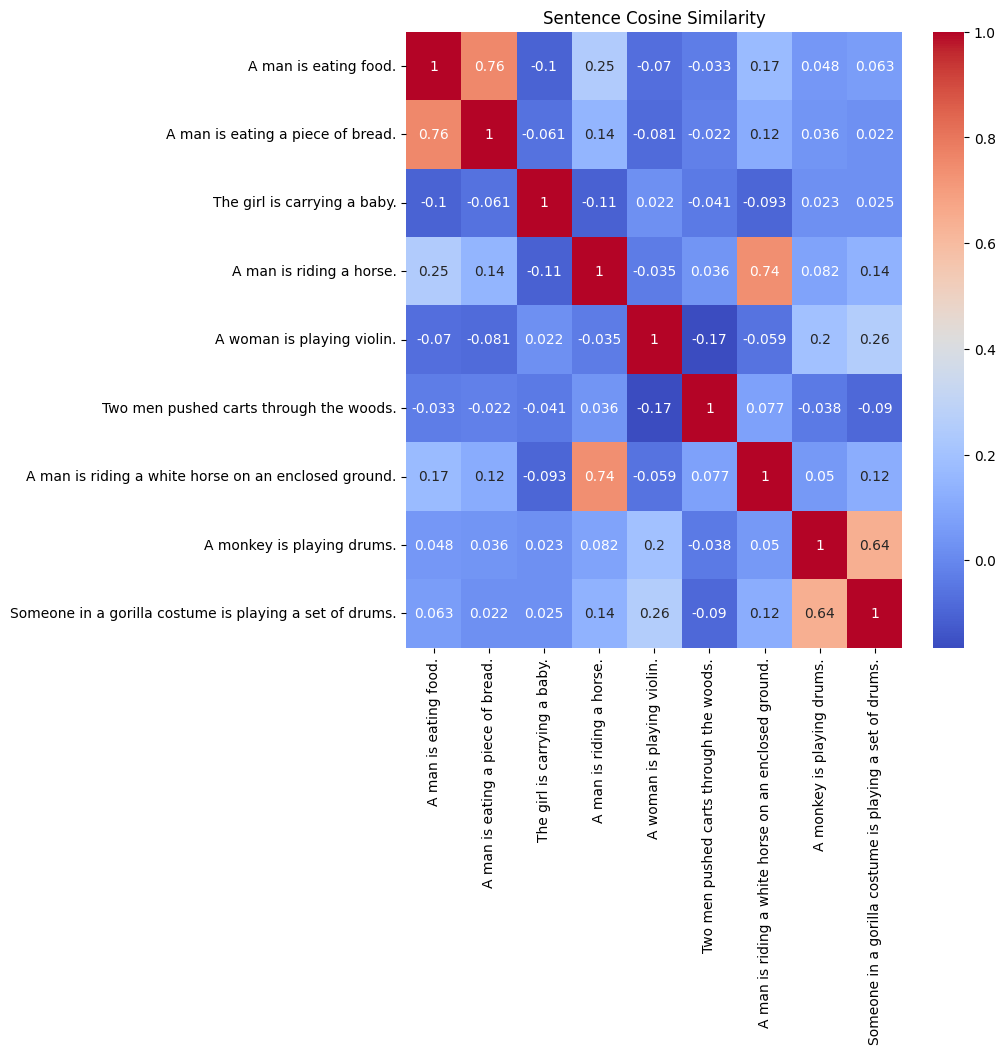

In [ ]:
# Convert to DataFrame for easier handling
cos_sim_df = pd.DataFrame(cos_sim.numpy(), index=sentences, columns=sentences)

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cos_sim_df, annot=True, cmap='coolwarm')
plt.title("Sentence Cosine Similarity")
plt.show()

## Embeddings for Questions and Answer problems



In [ ]:
#Load the model - This is trained for Q and A
model = SentenceTransformer('sentence-transformers/multi-qa-distilbert-cos-v1')

In [ ]:
def score_similarity_qa(query, docs):
  """It Computes the similarity based on the question and the docs passed. Return list of paired scores."""

  #Encode query and documents
  query_emb = model.encode(query)
  doc_emb = model.encode(docs)

  #Compute dot score between query and all document embeddings
  scores = util.dot_score(query_emb, doc_emb)[0].cpu().tolist()

  #Combine docs & scores
  doc_score_pairs = list(zip(docs, scores))

  #Sort by decreasing score
  doc_score_pairs = sorted(doc_score_pairs, key=lambda x: x[1], reverse=True)

  return doc_score_pairs

In [ ]:
query = "How many people live in London?"
docs = ["Around 9 Million people live in London", "London is known for its financial district"]

doc_score_pairs = score_similarity_qa(query, docs)

In [ ]:
#Output passages & scores
for doc, score in doc_score_pairs:
    print(score, doc)

0.8703423142433167 Around 9 Million people live in London
0.452241450548172 London is known for its financial district


## More questions

Three themes: "cities", "food", "technology"

In [ ]:
# Define the questions
questions = [
    "What is the population of Tokyo?",
    "What are some popular Italian dishes?",
    "What are the applications of artificial intelligence?"
]

# Define the sentences
sentences = [
    "Tokyo is one of the most populous cities in the world, with over 14 million residents.",
    "New York City is known for its vibrant culture and diverse population.",
    "The population of Paris is around 2 million people.",
    "Sydney is famous for its Opera House and beautiful beaches.",
    "The city of Rio de Janeiro hosts the famous Carnival festival every year.",
    "London's history dates back to Roman times.",
    "Beijing, the capital of China, is rich in historical landmarks.",
    "Mumbai is the financial, commercial, and entertainment capital of India.",
    "Los Angeles is the center of the nation's film and television industry.",
    "The ancient city of Rome attracts millions of tourists annually.",
    "Italian cuisine is known for its use of fresh ingredients and includes dishes like pasta and pizza.",
    "Sushi, a traditional Japanese dish, is enjoyed worldwide.",
    "Indian food is famous for its spices and diverse flavors.",
    "French cuisine is renowned for its pastries and sophisticated cooking techniques.",
    "Mexican food, like tacos and burritos, is popular for its bold flavors.",
    "Thai cuisine is well-known for its balance of sweet, sour, spicy, and salty flavors.",
    "The Mediterranean diet consists of lots of fruits, vegetables, and olive oil.",
    "Chinese food varies greatly from region to region and includes a wide variety of flavors.",
    "American barbecue is all about slow-cooked meats and savory sauces.",
    "Spanish tapas are small, flavorful dishes perfect for sharing.",
    "Artificial intelligence is transforming industries with applications in automation and data analysis.",
    "Virtual reality is creating new opportunities in gaming and education.",
    "The development of electric cars is accelerating the shift towards sustainable transportation.",
    "Robotics are being used in manufacturing for improved efficiency and precision.",
    "Machine learning algorithms are central to advancements in AI.",
    "Blockchain technology promises to revolutionize digital security and transactions.",
    "The rise of the Internet of Things (IoT) is connecting everyday devices to the internet.",
    "Cloud computing has become essential for data storage and scalable computing power.",
    "Cybersecurity is increasingly important in protecting against online threats.",
    "5G technology is enhancing mobile connectivity and enabling new technological innovations."
]


In [ ]:
for query in questions:
  print("\nQUESTION:")
  print(query)
  print("\nCLOSEST ANSWERS:")
  doc_score_pairs = score_similarity_qa(query, sentences)
  for doc, score in doc_score_pairs[0:3]:
      print(score, doc)


QUESTION:
What is the population of Tokyo?

CLOSEST ANSWERS:
0.786830484867096 Tokyo is one of the most populous cities in the world, with over 14 million residents.
0.505084753036499 The population of Paris is around 2 million people.
0.36789000034332275 The ancient city of Rome attracts millions of tourists annually.

QUESTION:
What are some popular Italian dishes?

CLOSEST ANSWERS:
0.7062340974807739 Italian cuisine is known for its use of fresh ingredients and includes dishes like pasta and pizza.
0.45450788736343384 Sushi, a traditional Japanese dish, is enjoyed worldwide.
0.41443464159965515 Mexican food, like tacos and burritos, is popular for its bold flavors.

QUESTION:
What are the applications of artificial intelligence?

CLOSEST ANSWERS:
0.6876248121261597 Artificial intelligence is transforming industries with applications in automation and data analysis.
0.6269538402557373 Machine learning algorithms are central to advancements in AI.
0.5057169198989868 Robotics are bein

# Embedding words in Documents

In this example, we will download the sherlock text from a previous class and will embed words on it.

### Download sherlock.txt file from previous lectures

In [ ]:
!wget https://databootcamp-ut-2022.s3.amazonaws.com/sherlock.txt

--2024-01-28 16:33:55--  https://databootcamp-ut-2022.s3.amazonaws.com/sherlock.txt
Resolving databootcamp-ut-2022.s3.amazonaws.com (databootcamp-ut-2022.s3.amazonaws.com)... 54.231.140.105, 54.231.224.121, 54.231.171.249, ...
Connecting to databootcamp-ut-2022.s3.amazonaws.com (databootcamp-ut-2022.s3.amazonaws.com)|54.231.140.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 575772 (562K) [text/plain]
Saving to: ‘sherlock.txt’

sherlock.txt        100%[===================>] 562.28K  --.-KB/s    in 0.1s    

2024-01-28 16:33:55 (3.73 MB/s) - ‘sherlock.txt’ saved [575772/575772]



In [ ]:
# Read file
with open("sherlock.txt") as file:
    book = file.read()

In [ ]:
# get all unique words
words = list(set(re.split(r'(\b[^\s]+\b)', book)))
len(words)

9200

In [ ]:
# remove any empty string
words = [w for w in words if w.strip() and len(w)>=4 and "\n" not in w]
# randomly select 3,000 words
words = random.sample(words, 3000)
print(f"Number of words:{len(words):,}")

Number of words:3,000


In [ ]:
words[55]

'bundle'

## Create Embeddings for all words

In [ ]:
all_embeddings = []
for sentence in tqdm(words, total=len(words)):
    embeddings = model.encode(sentence, convert_to_tensor=True)
    all_embeddings.append(embeddings)

100%|██████████| 3000/3000 [00:35<00:00, 84.28it/s]


## Save embeddings to load into Tensorboar Projector

In [ ]:
## Connect to Google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!ls drive/MyDrive/sherlock

sherlock_words_embeddings.tsv  sherlock_words_labels.tsv


In [ ]:
# Save tab delimited embedding files
with open(f"drive/MyDrive/sherlock/sherlock_words_embeddings.tsv","w") as out:
    for emb in tqdm(all_embeddings, total=len(all_embeddings)):
        one_line = ""
        for e in emb.numpy():
            one_line += str(e)+"\t"
        out.write(one_line)
        out.write("\n")

100%|██████████| 3000/3000 [00:00<00:00, 3442.77it/s]


In [ ]:
# Save list of words
with open(f"drive/MyDrive/sherlock/sherlock_words_labels.tsv","w") as out:
    for s in tqdm(words):
        out.write(f"{s}\n")

100%|██████████| 3000/3000 [00:00<00:00, 936855.93it/s]


Download to your local computer and use https://projector.tensorflow.org/ to load embeddings and labels for embedding projection.

# YOUR TURN: Embedding Activity (can do this in any order)

1 - Go to https://www.sbert.net/docs/pretrained_models.html and choos a new models, try one of the activities above and compared scores (was it better? Worse?)

2 - Take a look at the other uses cases using the Sentence-Transformers documentation and replicate one example:
  - https://www.sbert.net/examples/applications/clustering/README.html
  - https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications

  This may include using a different model and/or using a different function. For instance paraphase-mining uses util.paraphrase_mining

3 - Chose a new text of your choosing, upload to your notebook session storage (so it can be read), and create a tensorboard projection of either words or sentences.
